In [ ]:
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [27]:
df = pd.read_csv('2015.csv')

In [78]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [60]:
sorted_regions = df.groupby('Region').mean().sort_values('Happiness Score', ascending=False).filter(items = ['Happiness Score'])
sorted_regions.head()

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167


Text(0, 0.5, 'Страны')

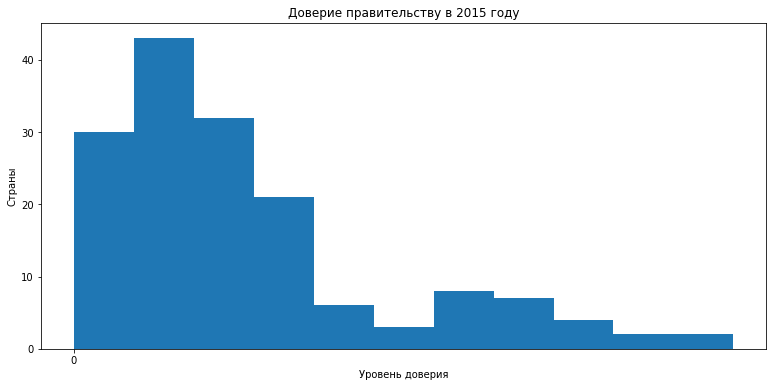

In [29]:
# Гистограмма: оценка индекса коррупции за 2015 год
df['Trust (Government Corruption)'].plot(kind='hist', 
                   bins=11,
                   title='Доверие правительству в 2015 году',
                   xlabel='Trust (Government Corruption)',
                   ylabel='Country',
                   xticks=range(0, 1))
plt.xlabel('Уровень доверия')
plt.ylabel('Страны')

Вывод: данный индекс показывает, что в целом по выборке население недовольно коррупцией власти и не доверяет ёй.

<AxesSubplot:title={'center':'Уровень счастья по регионам в 2015 году'}, xlabel='Happiness Score', ylabel='Region'>

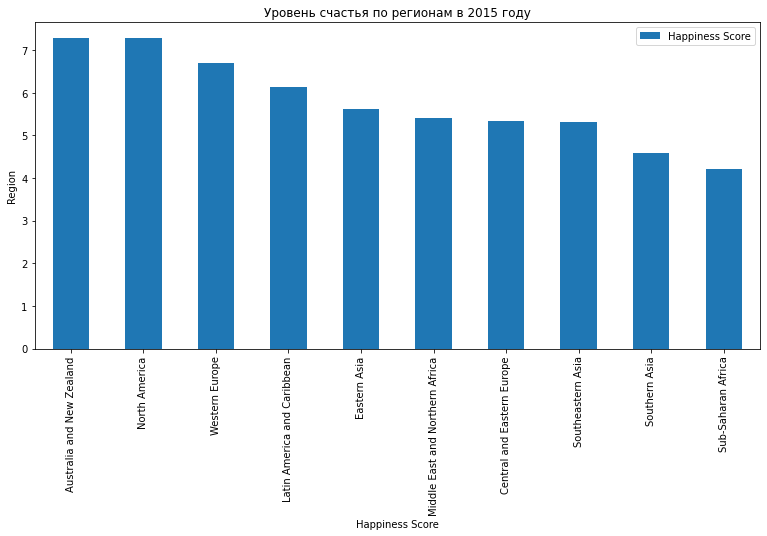

In [34]:
# Столбчатая диаграмма: Уровень счастья в зависимости от региона за 2015 год
sorted_regions.plot(kind='bar', 
                    title='Уровень счастья по регионам в 2015 году',
                    xlabel='Happiness Score',
                    ylabel='Region')

 Вывод: Ничего удивительного. Самые счастливые люди в Австралии, Северной Америке и Западной Европе - самых благополучных зонах планеты. Южная Азия и Центральная Африка замыкают список - как и положено регионам с наибольшим количеством горячих точек и низким уровнем жизни.

In [61]:
sorted_regions = sorted_regions.reset_index()

In [65]:
filtered_regions = sorted_regions[ (sorted_regions['Region']=='Australia and New Zealand') | 
                                    (sorted_regions['Region']=='North America') | 
                                    (sorted_regions['Region']=='Southern Asia') | 
                                    (sorted_regions['Region']=='Sub-Saharan Africa') 
                                 ]
filtered_regions.head()

,Region,Happiness Score
0,Australia and New Zealand,7.285000
1,North America,7.273000
8,Southern Asia,4.580857
9,Sub-Saharan Africa,4.202800


In [66]:
filtered_regions['Population'] = [30, 579, 1800, 800]
filtered_regions.head()

<ipython-input-66-2fc7a5a3f20e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_regions['Population'] = [30, 579, 1800, 800]


,Region,Happiness Score,Population
0,Australia and New Zealand,7.285000,30
1,North America,7.273000,579
8,Southern Asia,4.580857,1800
9,Sub-Saharan Africa,4.202800,800


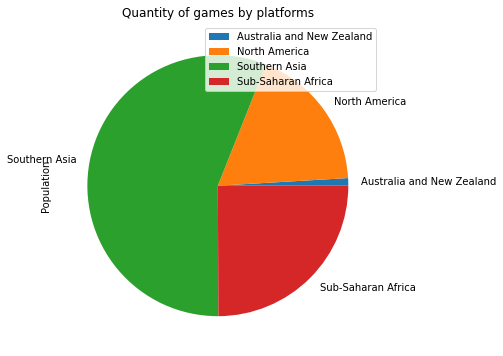

In [74]:
# количество игр по платформам
ax = filtered_regions.plot(kind='pie',
                   title='Quantity of games by platforms',
                          labels = filtered_regions['Region'],
                          y='Population')

Эта круговая диаграмма показывает, что если взять два лучших и два худших региона по уровню счастья - то подавляющее
количество людей живут как раз там где плохо. Можно даже предположить, что неконтролируемое размножение приводит к
снижению качества жизни. Или, что низкий уровень жизни стимулирует размножение.

<AxesSubplot:title={'center':'Взаимосвязь между размером семьи и уровнем счастья'}, xlabel='Happiness Score', ylabel='Family'>

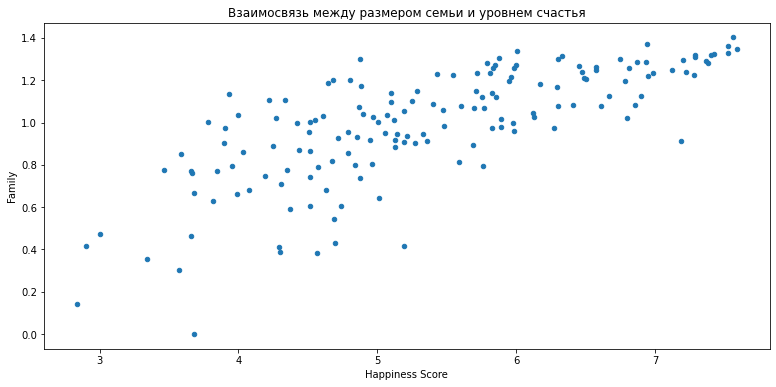

In [76]:
df.plot(kind='scatter', 
        x='Happiness Score', 
        y='Family', 
        title='Взаимосвязь между размером семьи и уровнем счастья')

Интересный результат. Ясно просматривается линейный рост счастья при увеличении семьи. То есть, в странах с более полными семьями счастье людей будет выше при прочих равных.  